In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from cycler import cycler #for matplotlib colors
import seaborn as sns

In [23]:
from sqlalchemy import create_engine

# Exploratory data analyses
1. Date of metric by fact, by document type/primary org (e.g., page views over date-dimension stratified by document type)
2. content-specific performance metric (e.g. reading age) by user-related performance metric (e.g., page views) over a defined time-period (min-max in date dimension)

### Read in data

In [83]:
db = pd.read_csv('DATA/database_27APR18')

In [89]:
db.shape

(13525462, 18)

In [93]:
db

,7d3c6b48-d67e-45c6-a7e2-caac927bfdbc,/equine-apprenticeships,Unnamed: 2,Unnamed: 3,redirect,other,2012-04-12 00:00:00,2016-02-29 09:24:10,live,0,0.1,0.2,0.3,0.4,0.5,0.6,Unnamed: 16,Unnamed: 17
0,5f932dd5-55e6-46af-8325-861f9fead7fd,/adi-voluntary-code-of-practice,NaN,NaN,redirect,other,2016-02-29 09:24:10,2016-02-29 09:24:10,live,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN
1,7adc2d6b-cb70-470e-9ccf-c74c1b8eb848,/cael-a-defnyddio-dalenni-parhad-ar-gyfer-pasb...,NaN,NaN,redirect,other,2014-07-08 17:22:00,2016-02-29 09:24:10,live,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN
2,7d3c6b48-d67e-45c6-a7e2-caac927bfdbc,/equine-apprenticeships,NaN,NaN,redirect,other,2012-04-12 00:00:00,2016-02-29 09:24:10,live,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN
3,852ebed7-c0f1-11e4-8223-005056011aef,/government/people/david-houghton.pl,Group Captain David Houghton,NaN,placeholder_person,other,2013-02-18 12:50:05,2013-04-11 12:01:06,live,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN
4,852e9314-c0f1-11e4-8223-005056011aef,/government/people/denis-oconnor,Sir Denis O'Connor Police Adviser,NaN,placeholder_person,other,2013-01-02 17:49:58,2013-01-02 17:49:58,live,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN
5,9b6a9aa5-448b-49b0-a4f2-e011b85a2934,/planning-permission-a-guide-for-business,NaN,NaN,redirect,other,2005-07-15 16:01:00,2016-02-29 09:24:10,live,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN
6,d966d284-a6a8-49d6-a294-d4b3e7e2c66b,/change-your-charity-structure,NaN,NaN,redirect,other,2014-12-02 16:13:00,2016-02-29 09:24:10,live,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN
7,85408fa6-c0f1-11e4-8223-005056011aef,/government/people/andrew-coulson,Andrew Coulson,NaN,placeholder_person,other,2014-09-22 12:36:39,2015-07-01 13:36:39,live,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN
8,e93d1db7-56f3-4ee4-83ce-2574ecbbe833,/local-planning-authorities-strategic-flood-ri...,NaN,NaN,redirect,other,2013-07-01 00:00:00,2016-02-29 09:24:10,live,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN
9,909b8d17-0fa9-5ef2-b006-0322950bace1,/hmrc-internal-manuals/test-manual-main-conten...,NaN,NaN,NaN,NaN,NaN,NaN,gone,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN


In [70]:
facts_metrics = pd.read_sql_query('select * from "facts_metrics"',con=engine)

In [71]:
facts_metrics.head()

,id,dimensions_date_id,dimensions_item_id,created_at,updated_at,pageviews,unique_pageviews,feedex_comments
0,33196515,2018-04-14,3063416,2018-04-15 01:05:45.989887,2018-04-15 01:05:45.989887,0,0,0
1,33196516,2018-04-14,3063417,2018-04-15 01:05:45.989887,2018-04-15 01:05:45.989887,0,0,0
2,33196517,2018-04-14,3063418,2018-04-15 01:05:45.989887,2018-04-15 01:05:45.989887,0,0,0
3,33196518,2018-04-14,3063419,2018-04-15 01:05:45.989887,2018-04-15 01:05:45.989887,0,0,0
4,33196519,2018-04-14,3063420,2018-04-15 01:05:45.989887,2018-04-15 01:05:45.989887,0,0,0


In [72]:
facts_metrics['date'] = pd.to_datetime(facts_metrics['dimensions_date_id'])

In [81]:
facts_metrics.groupby(pd.Grouper(key='date', freq='D', sort=True))['pageviews'].sum()

date
2018-04-08    348862528
2018-04-09    266794397
2018-04-10    661592412
2018-04-11    632246177
2018-04-12      7393483
2018-04-13      7595369
2018-04-14    297453298
2018-04-15    329517229
2018-04-16    698210240
2018-04-17    655944890
Freq: D, Name: pageviews, dtype: int64

In [80]:
facts_metrics.groupby(pd.Grouper(key='date', freq='D', sort=True))['unique_pageviews'].count()

date
2018-04-08    418261
2018-04-09    417781
2018-04-10    419014
2018-04-11    419316
2018-04-12    419890
2018-04-13    420392
2018-04-14    420550
2018-04-15    420556
2018-04-16    420797
2018-04-17    421005
Freq: D, Name: unique_pageviews, dtype: int64

In [79]:
facts_metrics[facts_metrics['date']==pd.Timestamp('2018-04-09')].sum()

id                    12905568843531
dimensions_item_id     1367075103849
pageviews                  266794397
unique_pageviews           213068846
feedex_comments                    0
dtype: int64

In [ ]:
facts_metrics[facts_metrics['date']==pd.Timestamp('2018-04-09')].shape

In [ ]:
facts_metrics[facts_metrics['date']==pd.Timestamp('2018-04-09')].dimensions_item_id.nunique()

In [77]:
facts_metrics.groupby(pd.Grouper(key='date', freq='D', sort=True))['unique_pageviews'].mean()

date
2018-04-08     683.586576
2018-04-09     510.001283
2018-04-10    1260.282886
2018-04-11    1205.426604
2018-04-12      12.266182
2018-04-13      12.761879
2018-04-14     583.788477
2018-04-15     639.950233
2018-04-16    1322.871218
2018-04-17    1246.935789
Freq: D, Name: unique_pageviews, dtype: float64

In [27]:
dates = pd.read_sql_query('select * from "dimensions_dates"',con=engine)

In [28]:
dates.shape

(10, 18)

In [29]:
dates

,date,date_name,date_name_abbreviated,year,quarter,month,month_name,month_name_abbreviated,week,day_of_year,day_of_quarter,day_of_month,day_of_week,day_name,day_name_abbreviated,weekday_weekend,created_at,updated_at
0,2018-04-09,9 April 2018,9 Apr 2018,2018,2,4,April,Apr,15,99,9,9,1,Monday,Mon,Weekday,2018-04-10 13:04:44.558481,2018-04-10 13:04:44.558481
1,2018-04-08,8 April 2018,8 Apr 2018,2018,2,4,April,Apr,14,98,8,8,7,Sunday,Sun,Weekend,2018-04-10 16:31:35.124529,2018-04-10 16:31:35.124529
2,2018-04-10,10 April 2018,10 Apr 2018,2018,2,4,April,Apr,15,100,10,10,2,Tuesday,Tue,Weekday,2018-04-11 01:00:03.403455,2018-04-11 01:00:03.403455
3,2018-04-11,11 April 2018,11 Apr 2018,2018,2,4,April,Apr,15,101,11,11,3,Wednesday,Wed,Weekday,2018-04-12 01:00:03.606661,2018-04-12 01:00:03.606661
4,2018-04-12,12 April 2018,12 Apr 2018,2018,2,4,April,Apr,15,102,12,12,4,Thursday,Thu,Weekday,2018-04-13 01:00:03.141701,2018-04-13 01:00:03.141701
5,2018-04-13,13 April 2018,13 Apr 2018,2018,2,4,April,Apr,15,103,13,13,5,Friday,Fri,Weekday,2018-04-14 01:00:03.426223,2018-04-14 01:00:03.426223
6,2018-04-14,14 April 2018,14 Apr 2018,2018,2,4,April,Apr,15,104,14,14,6,Saturday,Sat,Weekend,2018-04-15 01:00:02.909629,2018-04-15 01:00:02.909629
7,2018-04-15,15 April 2018,15 Apr 2018,2018,2,4,April,Apr,15,105,15,15,7,Sunday,Sun,Weekend,2018-04-16 01:00:03.518471,2018-04-16 01:00:03.518471
8,2018-04-16,16 April 2018,16 Apr 2018,2018,2,4,April,Apr,16,106,16,16,1,Monday,Mon,Weekday,2018-04-17 01:00:03.746801,2018-04-17 01:00:03.746801
9,2018-04-17,17 April 2018,17 Apr 2018,2018,2,4,April,Apr,16,107,17,17,2,Tuesday,Tue,Weekday,2018-04-18 01:00:03.343265,2018-04-18 01:00:03.343265


In [30]:
items = pd.read_sql_query('select * from "dimensions_items"',con=engine)

In [31]:
items.columns

Index(['id', 'content_id', 'title', 'base_path', 'description', 'created_at',
       'updated_at', 'latest', 'raw_json', 'number_of_pdfs', 'document_type',
       'content_purpose_document_supertype', 'first_published_at',
       'public_updated_at', 'outdated', 'number_of_word_files', 'status',
       'readability_score', 'contractions_count', 'equality_count',
       'indefinite_article_count', 'passive_count', 'profanities_count',
       'redundant_acronyms_count', 'repeated_words_count', 'simplify_count',
       'spell_count', 'string_length', 'sentence_count', 'word_count',
       'primary_organisation_title', 'primary_organisation_content_id',
       'primary_organisation_withdrawn', 'content_hash', 'outdated_at',
       'locale'],
      dtype='object')

In [33]:
items.shape

(487994, 36)

### Distribution of metrics

### Join facts_metrics to specific item variables

In [34]:
content_performance_bytime = pd.merge(
    left=facts_metrics,
    right=items,
    left_on='dimensions_item_id', # which taxon is the content item tagged to
    right_on='id', # what is the id of that taxon
    how='outer', # keep everything for checking merge
    indicator=True # so we can filter by match type
)

In [35]:
content_performance_bytime.groupby('_merge').size()

_merge
left_only           0
right_only          1
both          4197562
dtype: int64

In [36]:
content_performance_bytime[content_performance_bytime['_merge']=='right_only']

,id_x,dimensions_date_id,dimensions_item_id,created_at_x,updated_at_x,pageviews,unique_pageviews,feedex_comments,id_y,content_id,...,string_length,sentence_count,word_count,primary_organisation_title,primary_organisation_content_id,primary_organisation_withdrawn,content_hash,outdated_at,locale,_merge
4197562,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,3551332,bb2a363f-d60e-47f1-8fb7-9bc5c2f1ecb3,...,0.0,0.0,0.0,None,None,None,None,2018-04-18 03:53:57.535751,en,right_only


### Dates to index for plots

In [37]:
content_performance_bytime['date'] = pd.to_datetime(content_performance_bytime['dimensions_date_id'])
content_performance_bytime.index = content_performance_bytime['date']

## Metric over time, by doc type

In [45]:
content_performance_bytime.groupby(pd.Grouper(key='date', freq='D', sort=True))['unique_pageviews']

In [40]:
content_performance_bytime.groupby(pd.Grouper(key='date', freq='D', sort=True))['unique_pageviews'].count()

date
2018-04-08    418261
2018-04-09    417781
2018-04-10    419014
2018-04-11    419316
2018-04-12    419890
2018-04-13    420392
2018-04-14    420550
2018-04-15    420556
2018-04-16    420797
2018-04-17    421005
Name: unique_pageviews, dtype: int64

In [41]:
content_performance_bytime.groupby(pd.Grouper(key='date', freq='D', sort=True))['unique_pageviews'].mean()

date
2018-04-08     683.586576
2018-04-09     510.001283
2018-04-10    1260.282886
2018-04-11    1205.426604
2018-04-12      12.266182
2018-04-13      12.761879
2018-04-14     583.788477
2018-04-15     639.950233
2018-04-16    1322.871218
2018-04-17    1246.935789
Name: unique_pageviews, dtype: float64

In [42]:
content_performance_bytime.groupby(pd.Grouper(key='date', freq='D', sort=True))['unique_pageviews'].size()

date
2018-04-08    418261
2018-04-09    417781
2018-04-10    419014
2018-04-11    419316
2018-04-12    419890
2018-04-13    420392
2018-04-14    420550
2018-04-15    420556
2018-04-16    420797
2018-04-17    421005
Name: unique_pageviews, dtype: int64

In [46]:
content_performance_bytime.groupby(pd.Grouper(key='date', sort=True))['unique_pageviews'].sum()

date
2018-04-08    285917605.0
2018-04-09    213068846.0
2018-04-10    528076173.0
2018-04-11    505454662.0
2018-04-12      5150447.0
2018-04-13      5364992.0
2018-04-14    245512244.0
2018-04-15    269134910.0
2018-04-16    556660240.0
2018-04-17    524966202.0
Name: unique_pageviews, dtype: float64

In [113]:
def plot_time_metric(df, metric):
    grouped = df.groupby([df.index, pd.Grouper(freq='D')])[metric].sum() #resample operation for each day in datime index, sum the metric
    grouped.index = grouped.index.droplevel()
    ax = grouped.plot()
    ax.set_ylabel(metric)
    ax.set_xlabel('Date')

    return ax
    

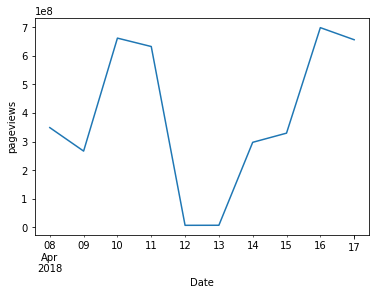

In [114]:
plot_time_metric(content_performance_bytime, 'pageviews')

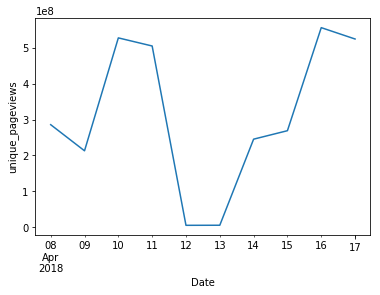

In [115]:
plot_time_metric(content_performance_bytime, 'unique_pageviews')

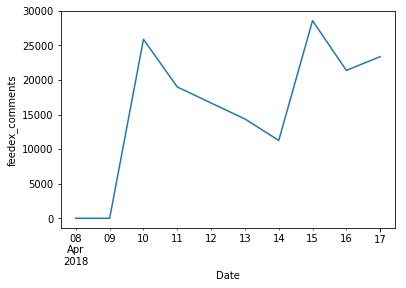

In [116]:
plot_time_metric(content_performance_bytime, 'feedex_comments')

### trying to get weekday onto plot. 
Aborted for now. think ax.table might work

In [79]:
grouped = content_performance_bytime.groupby([content_performance_bytime.index, pd.Grouper(freq='D')])['pageviews'].sum()
grouped.index = grouped.index.droplevel()


In [82]:
grouped = grouped.to_frame()

In [85]:
grouped['day'] = grouped.index.weekday_name

In [87]:
grouped

,pageviews,day
date,,
2018-04-08,348862528.0,Sunday
2018-04-09,266794397.0,Monday
2018-04-10,661592412.0,Tuesday
2018-04-11,632246177.0,Wednesday
2018-04-12,7393483.0,Thursday
2018-04-13,7595369.0,Friday
2018-04-14,297453298.0,Saturday
2018-04-15,329517229.0,Sunday
2018-04-16,698210240.0,Monday


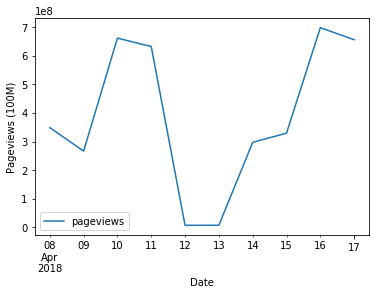

In [105]:
ax = grouped.plot()
ax.set_ylabel('Pageviews (100M)')
ax.set_xlabel('Date')
plt.show()

In [95]:
list(zip(grouped.index, grouped.index.weekday_name))

[(Timestamp('2018-04-08 00:00:00'), 'Sunday'),
 (Timestamp('2018-04-09 00:00:00'), 'Monday'),
 (Timestamp('2018-04-10 00:00:00'), 'Tuesday'),
 (Timestamp('2018-04-11 00:00:00'), 'Wednesday'),
 (Timestamp('2018-04-12 00:00:00'), 'Thursday'),
 (Timestamp('2018-04-13 00:00:00'), 'Friday'),
 (Timestamp('2018-04-14 00:00:00'), 'Saturday'),
 (Timestamp('2018-04-15 00:00:00'), 'Sunday'),
 (Timestamp('2018-04-16 00:00:00'), 'Monday'),
 (Timestamp('2018-04-17 00:00:00'), 'Tuesday')]

That's a bit odd. Assumed 12/13th would be weekend but they're Thurs/Friday. 

In [33]:
grouped.index.weekday_name

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday'],
      dtype='object', name='date')

### Stratify by categorical variables

In [121]:
def plot_time_metric_byvar(df, metric, byvar):
    grouped = df.groupby([byvar, pd.Grouper(freq='D')])[metric].sum()
    by_day = grouped.unstack(byvar, fill_value=0)
    top = by_day.iloc[:, by_day.columns.isin(by_day.min().sort_values(ascending=False)[:10].index)]
    bottom = by_day.iloc[:, by_day.columns.isin(by_day.min().sort_values()[:10].index)]
    
    ax = top.plot()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel(metric)
    ax.set_xlabel('Date')
    ax.set_title('Top 10 {}s for {}'.format(byvar, metric))
    
    ay = bottom.plot()
    ay.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ay.set_ylabel(metric)
    ay.set_xlabel('Date')
    ay.set_title('Bottom 10 {}s for {}'.format(byvar, metric))

    return ax, ay
    

(<matplotlib.axes._subplots.AxesSubplot at 0x1e8c52470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ff4e45c0>)

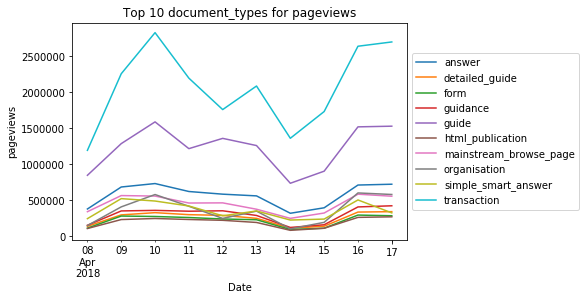

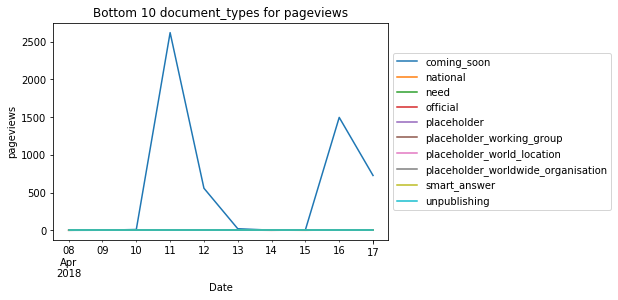

In [122]:
plot_time_metric_byvar(df=content_performance_bytime, metric='pageviews', byvar='document_type')

(<matplotlib.axes._subplots.AxesSubplot at 0x1fa763630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x215c6f1d0>)

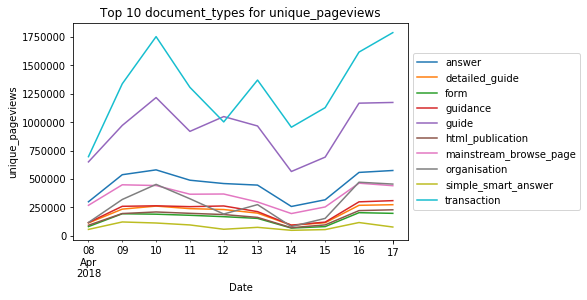

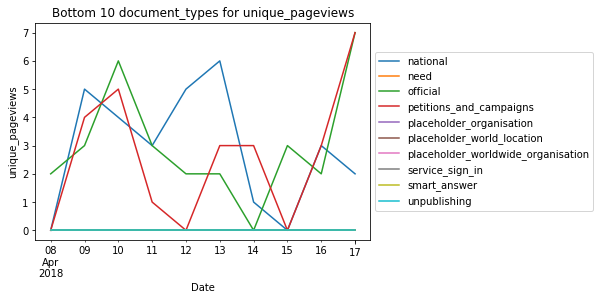

In [123]:
plot_time_metric_byvar(df=content_performance_bytime, metric='unique_pageviews', byvar='document_type')

(<matplotlib.axes._subplots.AxesSubplot at 0x20fa608d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22b4954e0>)

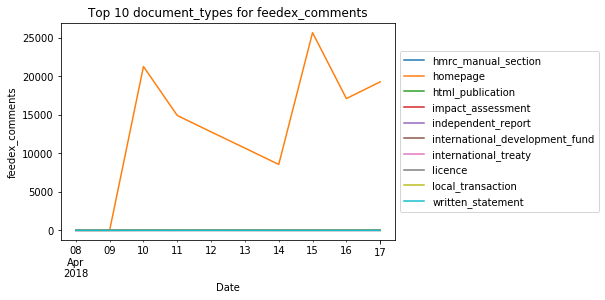

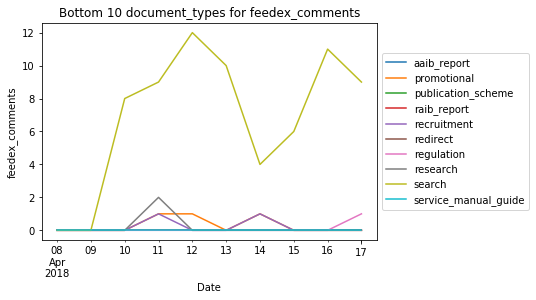

In [124]:
plot_time_metric_byvar(df=content_performance_bytime, metric='feedex_comments', byvar='document_type')

Document types with no page views in date range

In [125]:
#over the whole month (includes entire data range) total number of page views 

x = content_performance_bytime.groupby(['document_type', pd.Grouper(freq='M')])['pageviews'].sum()

In [126]:
#which documen types had no page views
x[x==0]

document_type                       date      
need                                2018-04-30    0.0
placeholder                         2018-04-30    0.0
placeholder_organisation            2018-04-30    0.0
placeholder_working_group           2018-04-30    0.0
placeholder_world_location          2018-04-30    0.0
placeholder_worldwide_organisation  2018-04-30    0.0
service_sign_in                     2018-04-30    0.0
smart_answer                        2018-04-30    0.0
unpublishing                        2018-04-30    0.0
world_location_news_article         2018-04-30    0.0
Name: pageviews, dtype: float64

(<matplotlib.axes._subplots.AxesSubplot at 0x23625e160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x242fe4588>)

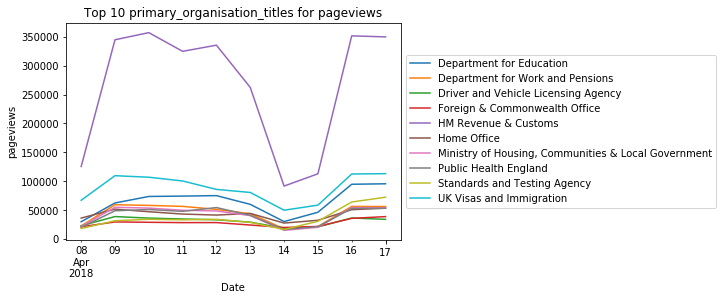

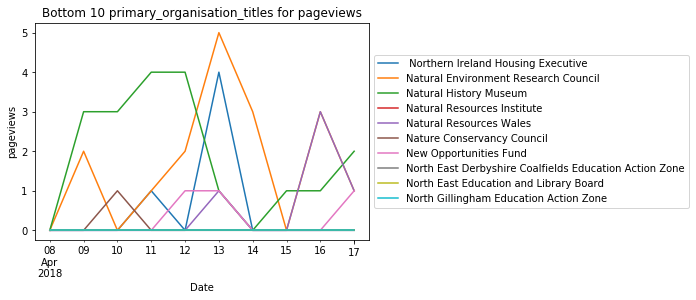

In [127]:
plot_time_metric_byvar(df=content_performance_bytime, metric='pageviews', byvar='primary_organisation_title')

(<matplotlib.axes._subplots.AxesSubplot at 0x246f62cc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2594ca208>)

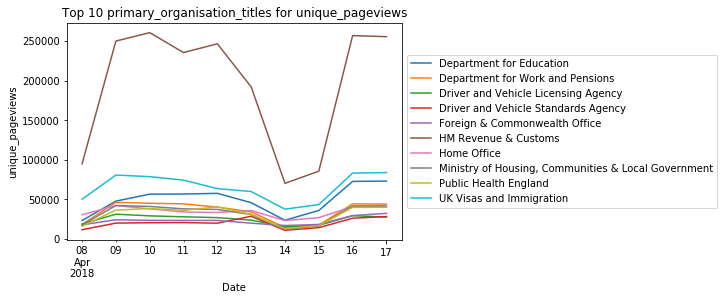

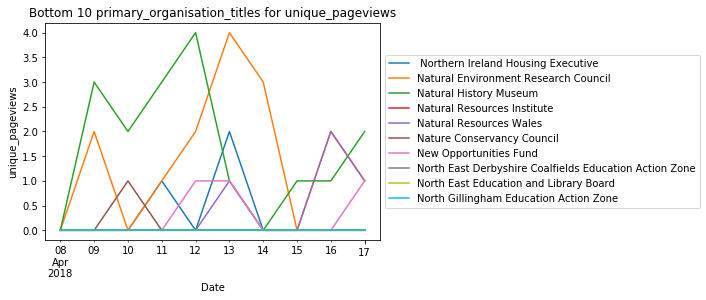

In [128]:
plot_time_metric_byvar(df=content_performance_bytime, metric='unique_pageviews', byvar='primary_organisation_title')

(<matplotlib.axes._subplots.AxesSubplot at 0x254a35ef0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26fa58358>)

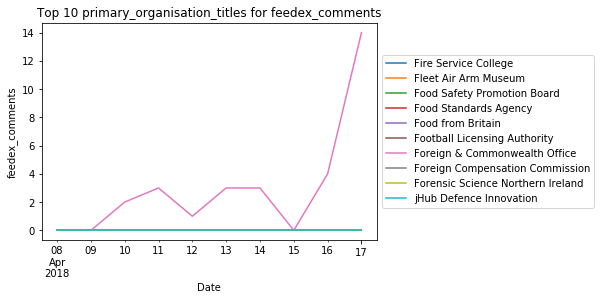

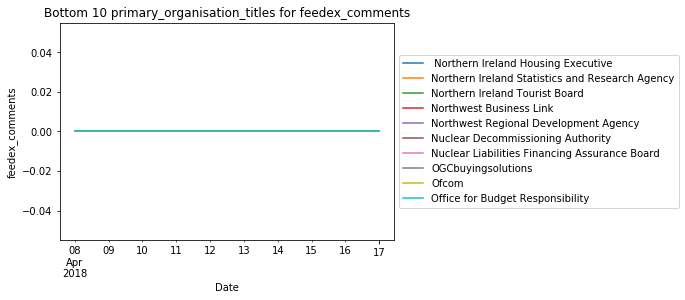

In [129]:
plot_time_metric_byvar(df=content_performance_bytime, metric='feedex_comments', byvar='primary_organisation_title')

(<matplotlib.axes._subplots.AxesSubplot at 0x26993e550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2860d2ef0>)

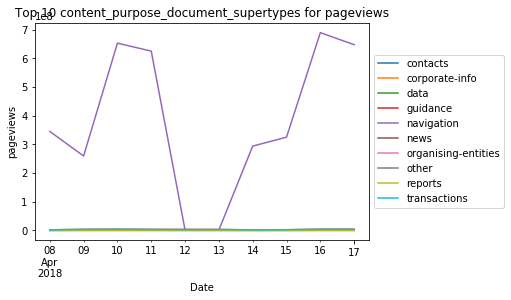

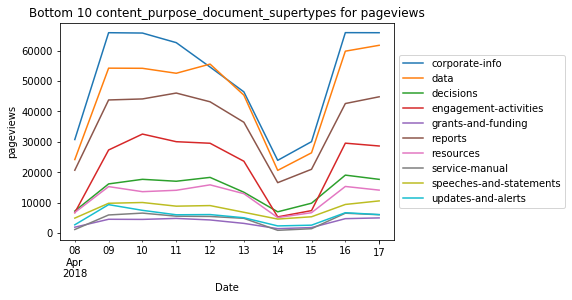

In [130]:
plot_time_metric_byvar(df=content_performance_bytime, metric='pageviews', byvar='content_purpose_document_supertype')

(<matplotlib.axes._subplots.AxesSubplot at 0x280b92d68>,
 <matplotlib.axes._subplots.AxesSubplot at 0x29df950f0>)

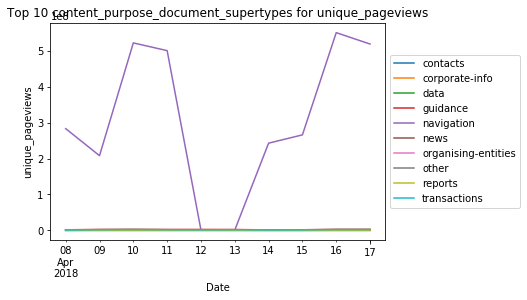

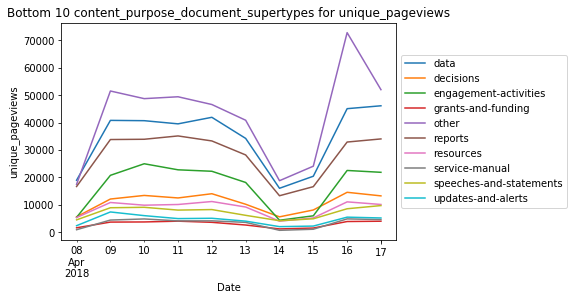

In [131]:
plot_time_metric_byvar(df=content_performance_bytime, metric='unique_pageviews', byvar='content_purpose_document_supertype')

(<matplotlib.axes._subplots.AxesSubplot at 0x298baec18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2aed1f3c8>)

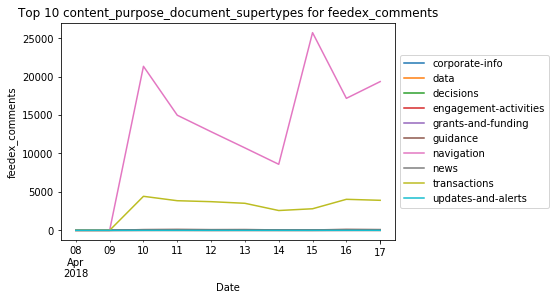

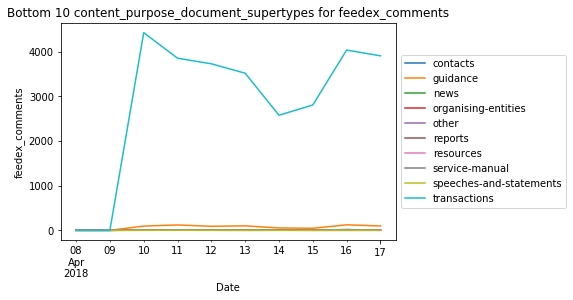

In [132]:
plot_time_metric_byvar(df=content_performance_bytime, metric='feedex_comments', byvar='content_purpose_document_supertype')

# Intrinsic content performance metrics
Explore those metrics generated by characteristics of the content itself and their correlation with metrics relating to user interaction with content.

In [136]:
metrics_time_independent = facts_metrics.groupby('dimensions_item_id').sum()

In [214]:
metrics_time_independent.shape

(487993, 4)

In [220]:
metrics_time_independent = metrics_time_independent.drop(['id'], axis=1)

In [221]:
content_performance = pd.merge(
    left=metrics_time_independent,
    right=items,
    left_index=True, # dimensions_items_id
    right_on='id', # database specific key
    how='outer', # keep everything for checking merge
    indicator=True # so we can filter by match type
)

In [231]:
#content_performance[content_performance.duplicated(subset='content_id', keep=False)].sort_values(by='content_id')

In [225]:
content_performance.content_id.nunique()

407620

In [224]:
content_performance.shape

(487994, 40)

<span style="color:red">There are multiple ids per content_id reflecting a change to the content e.g., re-written.</span>

**Need to think about left/right censoring for these items when considering date ranges**

In [223]:
content_performance.columns

Index(['pageviews', 'unique_pageviews', 'feedex_comments', 'id', 'content_id',
       'title', 'base_path', 'description', 'created_at', 'updated_at',
       'latest', 'raw_json', 'number_of_pdfs', 'document_type',
       'content_purpose_document_supertype', 'first_published_at',
       'public_updated_at', 'outdated', 'number_of_word_files', 'status',
       'readability_score', 'contractions_count', 'equality_count',
       'indefinite_article_count', 'passive_count', 'profanities_count',
       'redundant_acronyms_count', 'repeated_words_count', 'simplify_count',
       'spell_count', 'string_length', 'sentence_count', 'word_count',
       'primary_organisation_title', 'primary_organisation_content_id',
       'primary_organisation_withdrawn', 'content_hash', 'outdated_at',
       'locale', '_merge'],
      dtype='object')

In [154]:
def scatter_byvar(df, x, y, byvar, log=True):
    groups = df.groupby(byvar)

    # Plot
    cmap = plt.get_cmap('jet')
    colors = cmap(np.linspace(0, 1.0, len(groups)))

    fig, ax = plt.subplots()
    ax.set_prop_cycle(cycler('color', colors))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    
    ax.set_xlabel(x)
    ax.set_title('{} and {} by {}'.format(x, y, byvar))
    
    if log:
        for name, group in groups:
            ax.plot(group[x], np.log(group[y]), marker='o', linestyle='',  label=name, alpha=0.5)
            ax.set_ylabel('log({})'.format(y))
    else:
        for name, group in groups:
            ax.plot(group[x], group[y], marker='o', linestyle='',  label=name, alpha=0.5 )
            ax.set_ylabel(y)
            
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return ax

#### string length

In [175]:
content_performance.string_length.describe()

count    487993.00000
mean       1509.67859
std        3741.69593
min           0.00000
25%          78.00000
50%         423.00000
75%        1602.00000
max      101170.00000
Name: string_length, dtype: float64

In [183]:
content_performance[content_performance['string_length']==0].shape

(106802, 42)

In [195]:
print('{} out of {} content items ({}%) have a recorded string_length of 0'.format(
    content_performance[content_performance['string_length']==0].shape[0], 
    content_performance.content_id.nunique(),
    round(content_performance[content_performance['string_length']==0].shape[0]/content_performance.content_id.nunique()*100, 2)))

106802 out of 407620 content items (26.2%) have a recorded string_length of 0


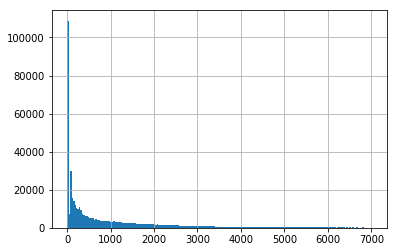

In [196]:
content_performance.string_length.hist(bins='auto', range=(0, 7000))

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


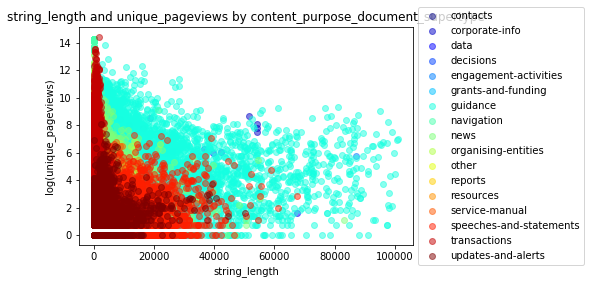

In [155]:
scatter_byvar(df=content_performance, x='string_length', y='unique_pageviews', byvar='content_purpose_document_supertype')

#### readability score
"Check readability"?!

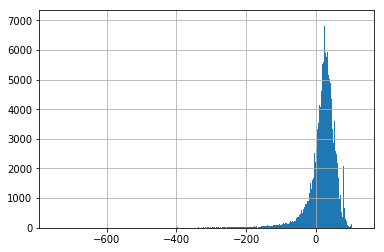

In [172]:
content_performance.readability_score.hist(bins='auto', range=(-750, 124))

In [173]:
content_performance.readability_score.describe()

count    380675.000000
mean         14.160349
std         111.051610
min      -11595.000000
25%           7.000000
50%          26.000000
75%          43.000000
max         124.000000
Name: readability_score, dtype: float64

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


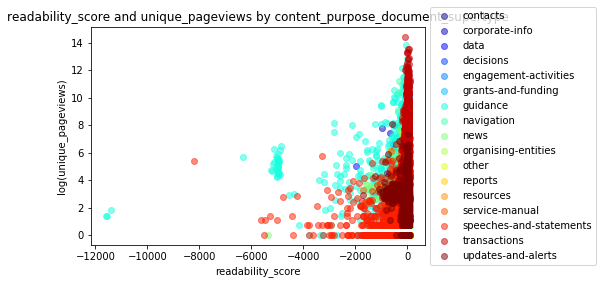

In [156]:
scatter_byvar(df=content_performance, x='readability_score', y='unique_pageviews', byvar='content_purpose_document_supertype')

#### Number of pdfs

In [206]:
content_performance.number_of_pdfs.describe()

count    483282.000000
mean          0.424071
std           2.513258
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         239.000000
Name: number_of_pdfs, dtype: float64

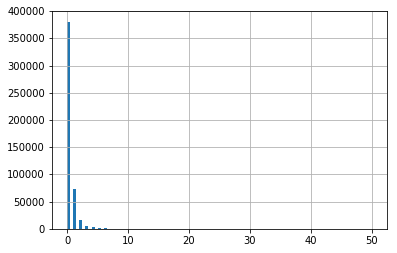

In [205]:
content_performance.number_of_pdfs.hist(bins=100, range=(0, 50))

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


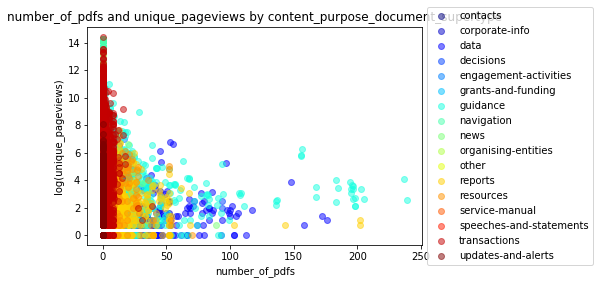

In [158]:
scatter_byvar(df=content_performance, x='number_of_pdfs', y='unique_pageviews', byvar='content_purpose_document_supertype')

#### Number of word files

In [207]:
content_performance.number_of_word_files.describe()

count    483282.000000
mean          0.020754
std           0.370829
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          84.000000
Name: number_of_word_files, dtype: float64

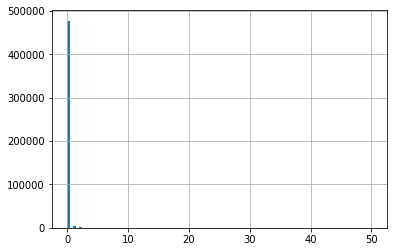

In [208]:
content_performance.number_of_word_files.hist(bins=100, range=(0, 50))

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


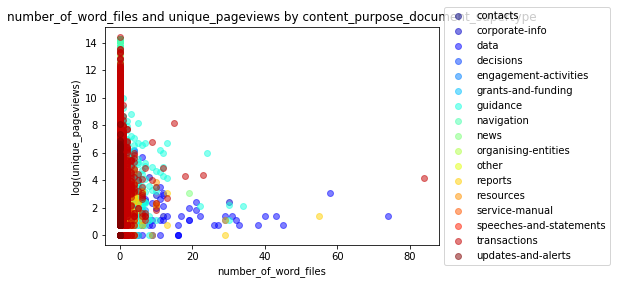

In [159]:
scatter_byvar(df=content_performance, x='number_of_word_files', y='unique_pageviews', byvar='content_purpose_document_supertype')

#### retractions
Check apostrophe use in contractions. 
This should feed into a general ‘spelling/grammar errors’ metric.

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


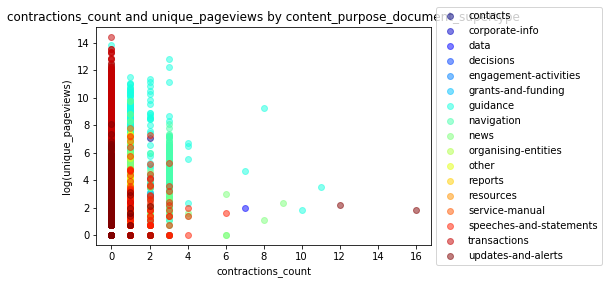

In [160]:
scatter_byvar(df=content_performance, x='contractions_count', y='unique_pageviews', byvar='content_purpose_document_supertype')

#### retext-equality 
- Warn about possible insensitive, inconsiderate language. This has some interesting changes (‘commit suicide’ to ‘die by suicide’, for example). Not sure how publishers would respond to this if they had lots of changes, but inclusive language should be important for us.

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


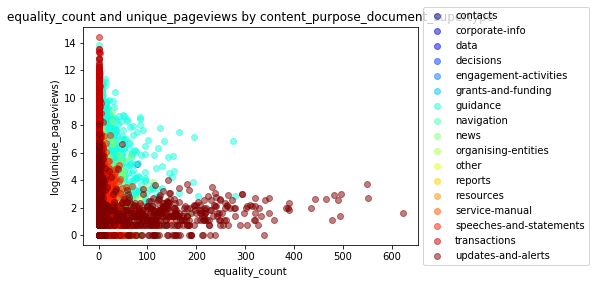

In [161]:
scatter_byvar(df=content_performance, x='equality_count', y='unique_pageviews', byvar='content_purpose_document_supertype')

#### retext-indefinite-article
Check if indefinite articles (a, an) are used correctly. This should feed into a general ‘spelling/grammar errors’ metric.


/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


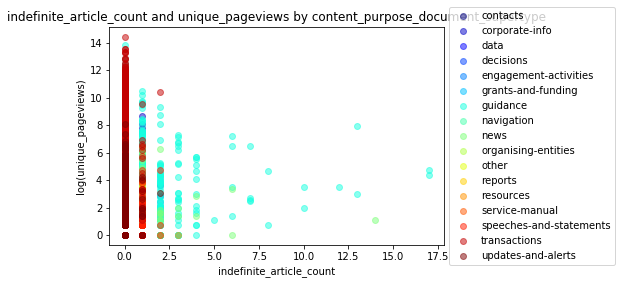

In [162]:
scatter_byvar(df=content_performance, x='indefinite_article_count', y='unique_pageviews', byvar='content_purpose_document_supertype')

In [232]:
#scatter_byvar(df=content_performance, x='readability_score', y='unique_pageviews', byvar='document_type')

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


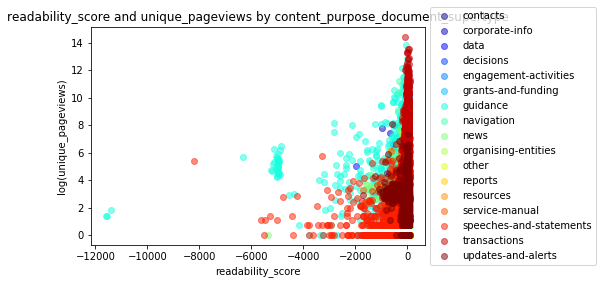

In [156]:
scatter_byvar(df=content_performance, x='readability_score', y='unique_pageviews', byvar='content_purpose_document_supertype')

## metric by content age

In [234]:
content_performance.columns

Index(['pageviews', 'unique_pageviews', 'feedex_comments', 'id', 'content_id',
       'title', 'base_path', 'description', 'created_at', 'updated_at',
       'latest', 'raw_json', 'number_of_pdfs', 'document_type',
       'content_purpose_document_supertype', 'first_published_at',
       'public_updated_at', 'outdated', 'number_of_word_files', 'status',
       'readability_score', 'contractions_count', 'equality_count',
       'indefinite_article_count', 'passive_count', 'profanities_count',
       'redundant_acronyms_count', 'repeated_words_count', 'simplify_count',
       'spell_count', 'string_length', 'sentence_count', 'word_count',
       'primary_organisation_title', 'primary_organisation_content_id',
       'primary_organisation_withdrawn', 'content_hash', 'outdated_at',
       'locale', '_merge'],
      dtype='object')

In [286]:
first_published = content_performance[['first_published_at', 'pageviews', 'unique_pageviews', 'document_type', 'content_purpose_document_supertype']].copy()

In [287]:
first_published['first_published_at'] = pd.to_datetime(first_published['first_published_at']).copy()
first_published.index = first_published['first_published_at']

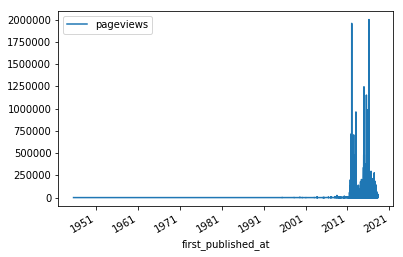

In [252]:
first_published.plot(x='first_published_at', y='pageviews')

Old items are generally not being viewed

(733772.0, 736694.0)

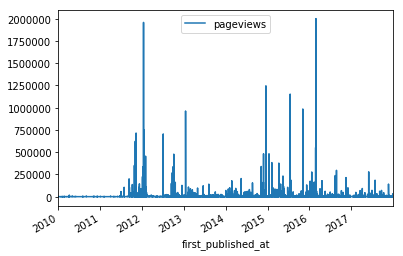

In [251]:
ax = first_published.plot(x='first_published_at', y='pageviews')
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))

(0, 1000)

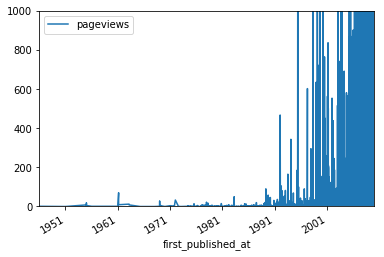

In [258]:
ay = first_published.plot(x='first_published_at', y='pageviews')
ay.set_xlim(pd.Timestamp('1945-12-31'), pd.Timestamp('2009-12-31'))
ay.set_ylim(0, 1000)

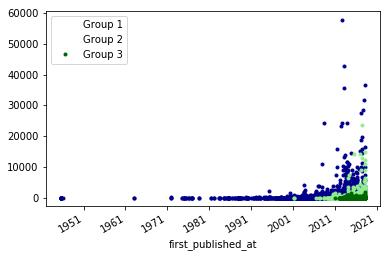

In [349]:
ax = first_published[first_published['document_type']=='guidance'].plot(x='first_published_at', y='pageviews', color='DarkBlue', label='Group 1', style=".")
first_published[first_published['document_type']=='news_story'].plot(x='first_published_at', y='pageviews', color='LightGreen', label='Group 2', style=".", ax=ax)
first_published[first_published['document_type']=='world_news_story'].plot(x='first_published_at', y='pageviews', color='DarkGreen', label='Group 3', style=".", ax=ax)

In [289]:
groups = first_published.groupby('content_purpose_document_supertype')

In [293]:
first_published.groupby('content_purpose_document_supertype').describe()

pageviews                                \
                                       count           mean            std   
content_purpose_document_supertype                                           
contacts                               266.0    3452.541353   13866.896361   
corporate-info                       13950.0      36.693620     402.681459   
data                                 41357.0      10.993254     109.470024   
decisions                            54919.0       2.610390      30.575727   
engagement-activities                 8797.0      25.085711     215.583307   
grants-and-funding                    1435.0      25.237631      69.283965   
guidance                            140242.0     203.121754    4670.686076   
navigation                           12703.0  302271.921042  672858.694850   
news                                107104.0      10.418276     193.868877   
organising-entities                   4443.0     907.355841   13407.403642   
other                                33971.0      18.247505    1709.541198   
reports                              32109.0      11.185929      92.672878   
resources                             2091.0      57.262076     355.204809   
service-manual                         189.0     234.962963     486.290216   
speeches-and-statements              15244.0       5.208279      53.629160   
transactions                          8929.0    3182.023407   37587.694625   
updates-and-alerts                    5533.0       9.823965      83.951179   

                                                                          \
                                    min    25%    50%     75%        max   
content_purpose_document_supertype                                         
contacts                            0.0  54.25  213.0  1197.0   163572.0   
corporate-info                      0.0   0.00    0.0     4.0    30843.0   
data                                0.0   0.00    0.0     2.0     8404.0   
decisions                           0.0   0.00    0.0     1.0     5079.0   
engagement-activities               0.0   0.00    1.0     3.0    12414.0   
grants-and-funding                  0.0   0.00    2.0    21.0      839.0   
guidance                            0.0   0.00    4.0    18.0  1245230.0   
navigation                          0.0   0.00   20.0   493.0  2000710.0   
news                                0.0   0.00    0.0     1.0    23514.0   
organising-entities                 0.0   6.00   23.0    91.0   622784.0   
other                               0.0   0.00    0.0     0.0   295844.0   
reports                             0.0   0.00    1.0     4.0    10672.0   
resources                           0.0   1.00    4.0    21.0    10046.0   
service-manual                      2.0  46.00  104.0   184.0     3875.0   
speeches-and-statements             0.0   0.00    0.0     2.0     4996.0   
transactions                        0.0   1.00   11.0    96.0  1957957.0   
updates-and-alerts                  0.0   0.00    0.0     4.0     4883.0   

                                   unique_pageviews                 \
                                              count           mean   
content_purpose_document_supertype                                   
contacts                                      266.0    2488.556391   
corporate-info                              13950.0      29.475556   
data                                        41357.0       8.315980   
decisions                                   54919.0       1.993682   
engagement-activities                        8797.0      19.225077   
grants-and-funding                           1435.0      20.893380   
guidance                                   140242.0     157.640764   
navigation                                  12703.0  243522.165079   
news                                       107104.0       9.176249   
organising-entities                          4443.0     711.361242   
other                                      

In [338]:
first_published.groupby('content_purpose_document_supertype').groups['other'].min()

Timestamp('2002-02-08 00:00:00')

In [317]:
for group in groups:
    print(min(group[1].first_published_at))

2014-12-04 09:38:33
1951-01-01 00:00:00
1981-07-31 23:00:00
1955-01-01 00:00:00
1994-03-31 23:01:00
2014-08-26 13:47:51
1945-07-18 10:11:00
1992-01-01 00:00:00
1995-07-20 00:00:00
2011-10-11 16:11:43
2002-02-08 00:00:00
1969-01-01 00:00:00
2005-05-31 23:00:00
2016-02-16 17:25:28
2008-06-24 00:00:00
1991-07-04 11:00:00
2002-04-09 01:00:00


In [318]:
first_published.index.min()

Timestamp('1945-07-18 10:11:00')

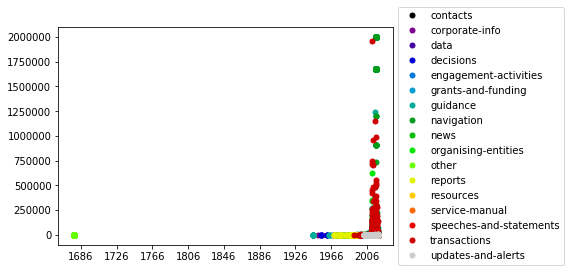

In [335]:
# Plot
cmap = plt.get_cmap('nipy_spectral')
colors = cmap(np.linspace(0, 1.0, len(groups)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', colors))

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    
    ax.plot(group['first_published_at'], group['pageviews'], marker='o', linestyle='', ms=5, label=name)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

ALERT! Cannot understand why this 1686 data is coming from. It is not showing up when I print the timestamps. how is it getting into plot ?



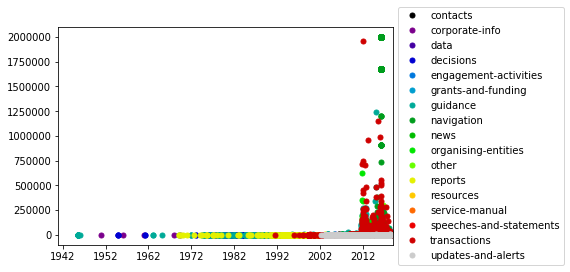

In [334]:
# Plot
cmap = plt.get_cmap('nipy_spectral')
colors = cmap(np.linspace(0, 1.0, len(groups)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', colors))

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    
    ax.plot(group['first_published_at'], group['pageviews'], marker='o', linestyle='', ms=5, label=name)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(pd.Timestamp('1940-12-31'), pd.Timestamp('2018-12-31'))

plt.show()

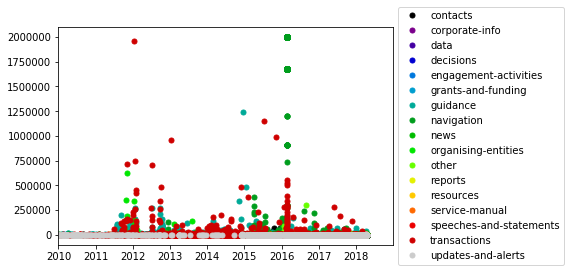

In [333]:
# Plot
cmap = plt.get_cmap('nipy_spectral')
colors = cmap(np.linspace(0, 1.0, len(groups)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', colors))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    
    ax.plot(group['first_published_at'], group['pageviews'], marker='o', linestyle='', ms=5, label=name)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2018-12-31'))

plt.show()

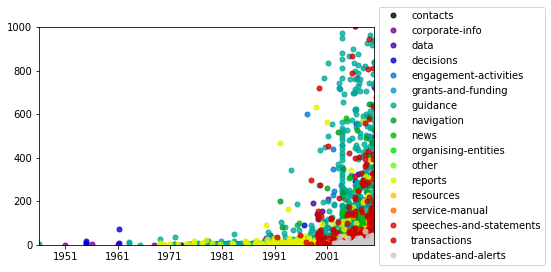

In [353]:
# Plot
cmap = plt.get_cmap('nipy_spectral')
colors = cmap(np.linspace(0, 1.0, len(groups)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', colors))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    
    ax.plot(group['first_published_at'], group['pageviews'], marker='o', linestyle='', ms=5, label=name, alpha=0.8)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(pd.Timestamp('1945-12-31'), pd.Timestamp('2009-12-31'))
ax.set_ylim(0, 1000)
plt.show()

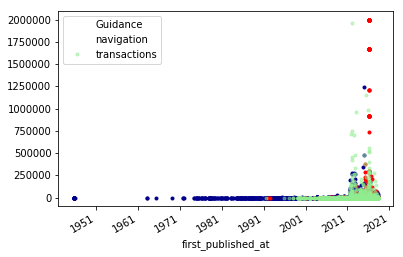

In [365]:
ax = first_published[first_published['content_purpose_document_supertype']=='guidance'].plot(x='first_published_at', y='pageviews', color='DarkBlue', label='Guidance', style=".")
first_published[first_published['content_purpose_document_supertype']=='navigation'].plot(x='first_published_at', y='pageviews', color='Red', label='navigation', style=".", ax=ax)
first_published[first_published['content_purpose_document_supertype']=='transactions'].plot(x='first_published_at', y='pageviews', color='LightGreen', label='transactions', style=".", alpha=0.5, ax=ax)


# Derived variables

- **ratio of page_views:unique_pageviews** if someone accessed the same page 8 times, it is either very useful and constantly referred to or not quick to understand, requiring many attempts
- **ratio of feedex_comments:unique_pageviews** of all the people visiting the page, what proportion have enough oomph to write a comment. Beware seleciton bias, different page types may attract different people who are more/less likely to repsond/respond in a particular way
- **composite grammar** can all spelling grammar metrics be simply combined?
- **days since published** might need a function to do days since published rather than working with first_published_at. Could be useful for other age objects too, if any modelling done

# Transformations

Consider different transformations to normalise metrics

In [366]:
items.columns

Index(['id', 'content_id', 'title', 'base_path', 'description', 'created_at',
       'updated_at', 'latest', 'raw_json', 'number_of_pdfs', 'document_type',
       'content_purpose_document_supertype', 'first_published_at',
       'public_updated_at', 'outdated', 'number_of_word_files', 'status',
       'readability_score', 'contractions_count', 'equality_count',
       'indefinite_article_count', 'passive_count', 'profanities_count',
       'redundant_acronyms_count', 'repeated_words_count', 'simplify_count',
       'spell_count', 'string_length', 'sentence_count', 'word_count',
       'primary_organisation_title', 'primary_organisation_content_id',
       'primary_organisation_withdrawn', 'content_hash', 'outdated_at',
       'locale'],
      dtype='object')